In [8]:
!python3 -m pip install pyedflib # BDF Format into Numpy
!python3 -m pip install heartpy # Convert ECG signal to BPM

In [1]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp
import glob
import pandas as pd
import os

In [2]:
f = pyedflib.EdfReader("./dataset/1340/Part_11_S_Trial20_emotion.bdf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)

print(sigbufs.shape)

(47, 38400)


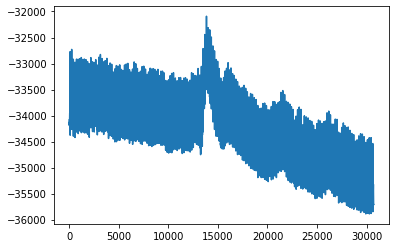

In [6]:
plt.figure()
data = sigbufs[34][:256*120]
plt.plot(data)

In [7]:
wd, m = hp.process(data, sample_rate = 256.0)

bpm: 93.017775
ibi: 645.038007
sdnn: 35.273227
sdsd: 13.881964
rmssd: 20.996341
pnn20: 0.271739
pnn50: 0.021739
hr_mad: 19.531250
sd1: 14.845562
sd2: 47.696412
s: 2224.499046
sd1/sd2: 0.311251
breathingrate: 0.133333


/home/pouya/.local/lib/python3.8/site-packages/heartpy/visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

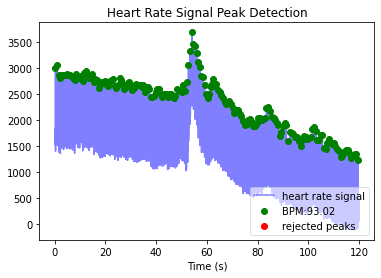

In [8]:
#set large figure
plt.figure(figsize=(12,4))

#call plotter
hp.plotter(wd, m)

#display measures computed
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [33]:
# from heartpy.datautils import rolling_mean, _sliding_window
# from heartpy.peakdetection import detect_peaks

In [34]:
# Searching for parameters
# for windowsize in np.linspace(0, 1, 10):
  
#   for ma_perc in np.linspace(0, 40, 80):

#     rol_mean = rolling_mean(data, windowsize = windowsize, sample_rate = 256.0)
#     wd = detect_peaks(data, rol_mean, ma_perc= ma_perc,sample_rate = 256.0)
#     len(wd['peaklist'])

In [4]:
def read_bdf(path):
    f = pyedflib.EdfReader(path)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
            sigbufs[i, :] = f.readSignal(i)
            
    return sigbufs

In [5]:
def get_bpm(data):
    wd, m = hp.process(data, sample_rate=256.0)
    return m['bpm']

In [22]:
bpms = {}

In [32]:
for session_folder in os.listdir("dataset"):
    
    if session_folder in bpms.keys():
        continue
        
    
    bdf_file = glob.glob("./dataset/{}/*.bdf".format(session_folder))[0]
    
    data = read_bdf(bdf_file)[34] # Channel 35 in data corresponds to ECG 
    
    print(session_folder)
    print(get_bpm(data))
    
    bpms[session_folder] = get_bpm(data)
    
    print('-' * 20)

546
82.17827457724276
--------------------
536
83.13163998740012
--------------------
932
79.98926260972272
--------------------
394
141.70609068252372
--------------------
808
61.630644125829235
--------------------
156
75.44435917114352
--------------------
1190
84.8812835855025
--------------------
1310
92.85020440965792
--------------------
402
65.30053475935829
--------------------
794
59.73615312269643
--------------------
1192
86.200416648952
--------------------
818
67.29283539028691
--------------------
654
69.20803109449658
--------------------
550
82.26564949315498
--------------------
22
69.8874917273329
--------------------
14
67.92384949782641
--------------------
916
74.89530221276175
--------------------
140
78.91912464319695
--------------------
560
82.31296073613217
--------------------
938
77.95934385056118
--------------------
688
70.70660572781377
--------------------


In [38]:
bpms_selected = {}

In [39]:
for session, bpm in bpms.items():
    if bpm < 100:
        bpms_selected[session] = bpm

In [47]:
df = pd.DataFrame(pd.Series(bpms_selected), columns=['bpm'])
df

,bpm
2,73.210177
532,84.185578
788,60.418617
132,73.083565
924,74.469018
...,...
916,74.895302
140,78.919125
560,82.312961
938,77.959344


(array([71., 49., 47., 11.]),
 array([ 60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 4 artists>)

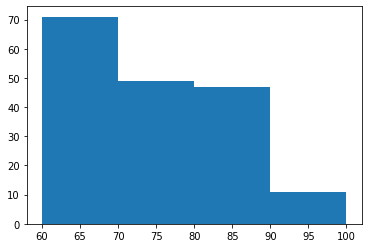

In [56]:
plt.hist(df["bpm"], bins=np.linspace(60, 100, 5))

In [58]:
df.to_csv("bpm_dataset.csv")